In [1]:
from ctd.comparison.analysis.tt.tt import Analysis_TT
from ctd.comparison.analysis.dt.dt import Analysis_DT
from ctd.comparison.comparison import Comparison
import dotenv
import os
import sys
# import environment variables
dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
print(HOME_DIR)


/home/csverst/Github/ctdTest/ComputationThruDynamicsBenchmark/


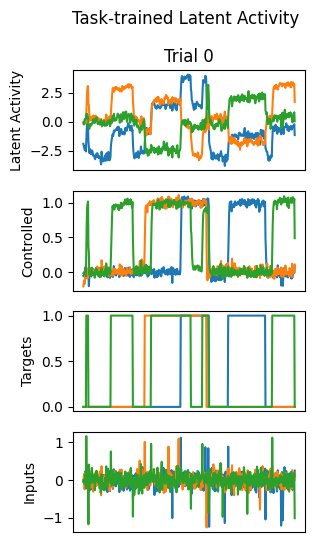

In [2]:
tt_path = HOME_DIR + "content/trained_models/task-trained/tt_3bff/"
tt_analysis = Analysis_TT(run_name = "tt_3bff",filepath=tt_path)

tt_analysis.plot_trial_io(num_trials= 1)

In [3]:

# REPLACE THESE PATHS WITH YOUR OWN DT MODEL PATHS
gru_sweep_path = tt_path + "20250103_NBFF_GRU_Sweep_Full/"
# lfads_sweep_path = tt_path + "20250103_3BFF_LFADS_Sweep2/"
# node_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_NODE_Resim3bff_Test/"
# lds_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_LDS_Resim3bff_Test/"

gru_subfolders = [f.path for f in os.scandir(gru_sweep_path) if f.is_dir()]
# lfads_subfolders = [f.path for f in os.scandir(lfads_sweep_path) if f.is_dir()]
# node_subfolders = [f.path for f in os.scandir(node_sweep_path) if f.is_dir()]
# lds_subfolders = [f.path for f in os.scandir(lds_sweep_path) if f.is_dir()]

In [4]:
comparison_GRU = Comparison(comparison_tag = "3BFF_GRU")
comparison_GRU.load_analysis(tt_analysis, group = "TT", reference_analysis=True)
lat_sizes = []
for subfolder in gru_subfolders:
    subfolder = subfolder + "/"
    print(subfolder.split("latent_size="))
    lat_size = int(subfolder.split("latent_size=")[1].split("_")[0])
    analysis_GRU = Analysis_DT.create(run_name = f"GRU_{lat_size}", filepath = subfolder, model_type = "SAE")
    print(f"GRU_{lat_size}")
    lat_sizes.append(lat_size)
    comparison_GRU.load_analysis(analysis_GRU, group = "GRU")

# comparison_LFADS = Comparison(comparison_tag = "3BFF_LFADS")
# comparison_LFADS.load_analysis(tt_analysis, group = "TT", reference_analysis=True)
# gen_sizes = []
# for subfolder in lfads_subfolders:
#     subfolder = subfolder + "/"
#     print(subfolder.split("gen_dim="))
#     gen_size = int(subfolder.split("gen_dim=")[1].split("_")[0])
#     analysis_LFADS = Analysis_DT.create(run_name = f"LFADS_{gen_size}", filepath = subfolder, model_type = "LFADS")
#     print(f"LFADS_{gen_size}")
#     gen_sizes.append(gen_size)
#     comparison_LFADS.load_analysis(analysis_LFADS, group = "LFADS")

# for subfolder in node_subfolders:
#     subfolder = subfolder + "/"
#     analysis_Node = Analysis_DT.create(run_name = "Node", filepath = subfolder, model_type = "SAE")
#     comparison.load_analysis(analysis_Node, group = "Node")

# for subfolder in lds_subfolders:
#     subfolder = subfolder + "/"
#     analysis_LDS = Analysis_DT.create(run_name = "LDS", filepath = subfolder, model_type = "SAE")
#     comparison.load_analysis(analysis_LDS, group = "LDS")
    

['/home/csverst/Github/ctdTest/ComputationThruDynamicsBenchmark/content/trained_models/task-trained/tt_3bff/20250103_NBFF_GRU_Sweep_Full/prefix=tt_3bff_', '3_max_epochs=500_seed=2/']
GRU_3
['/home/csverst/Github/ctdTest/ComputationThruDynamicsBenchmark/content/trained_models/task-trained/tt_3bff/20250103_NBFF_GRU_Sweep_Full/prefix=tt_3bff_', '16_max_epochs=500_seed=0/']
GRU_16
['/home/csverst/Github/ctdTest/ComputationThruDynamicsBenchmark/content/trained_models/task-trained/tt_3bff/20250103_NBFF_GRU_Sweep_Full/prefix=tt_3bff_', '8_max_epochs=500_seed=2/']
GRU_8
['/home/csverst/Github/ctdTest/ComputationThruDynamicsBenchmark/content/trained_models/task-trained/tt_3bff/20250103_NBFF_GRU_Sweep_Full/prefix=tt_3bff_', '3_max_epochs=500_seed=1/']
GRU_3
['/home/csverst/Github/ctdTest/ComputationThruDynamicsBenchmark/content/trained_models/task-trained/tt_3bff/20250103_NBFF_GRU_Sweep_Full/prefix=tt_3bff_', '32_max_epochs=500_seed=0/']
GRU_32
['/home/csverst/Github/ctdTest/ComputationThruDynam

In [5]:
metric_list = ["state_r2", "rate_r2", 'co-bps', 'linear_cycle_con']
metrics_GRU = comparison_GRU.compute_metrics(metric_list=metric_list, cycle_con_var=0.1)
# metrics_LFADS = comparison_LFADS.compute_metrics(metric_list=metric_list)


Working on 1 of 17: tt_3bff

Working on 2 of 17: GRU_3
State R2: 0.8701848983764648
Rate R2: 0.4446749687194824
CO-BPS: 0.061992812901735306
Linear Cycle Consistency R2: 1.0

Working on 3 of 17: GRU_16
State R2: 0.9722025990486145
Rate R2: 0.9451742172241211
CO-BPS: 0.13141711056232452
Linear Cycle Consistency R2: 1.0

Working on 4 of 17: GRU_8
State R2: 0.9673280119895935
Rate R2: 0.9058605432510376
CO-BPS: 0.12604261934757233
Linear Cycle Consistency R2: 1.0

Working on 5 of 17: GRU_3
State R2: 0.8116375207901001
Rate R2: 0.3924708366394043
CO-BPS: 0.05331132560968399
Linear Cycle Consistency R2: 1.0

Working on 6 of 17: GRU_32
State R2: 0.9661577343940735
Rate R2: 0.966772735118866
CO-BPS: 0.13493989408016205
Linear Cycle Consistency R2: 0.9656698703765869

Working on 7 of 17: GRU_8
State R2: 0.969083309173584
Rate R2: 0.9074046015739441
CO-BPS: 0.12622839212417603
Linear Cycle Consistency R2: 1.0

Working on 8 of 17: GRU_3
State R2: 0.8961370587348938
Rate R2: 0.39968255162239075


In [6]:

lat_sizes, metrics_GRU["state_r2"], metrics_GRU["rate_r2"], metrics_GRU["co-bps"], metrics_GRU['linear_cycle_con'] = zip(*sorted(zip(lat_sizes, metrics_GRU["state_r2"], metrics_GRU["rate_r2"], metrics_GRU["co-bps"], metrics_GRU['linear_cycle_con'])))
# gen_sizes, metrics_LFADS["state_r2"], metrics_LFADS["rate_r2"], metrics_LFADS["co-bps"], metrics_LFADS['linear_cycle_con'] = zip(*sorted(zip(gen_sizes, metrics_LFADS["state_r2"], metrics_LFADS["rate_r2"], metrics_LFADS["co-bps"], metrics_LFADS['linear_cycle_con'])))


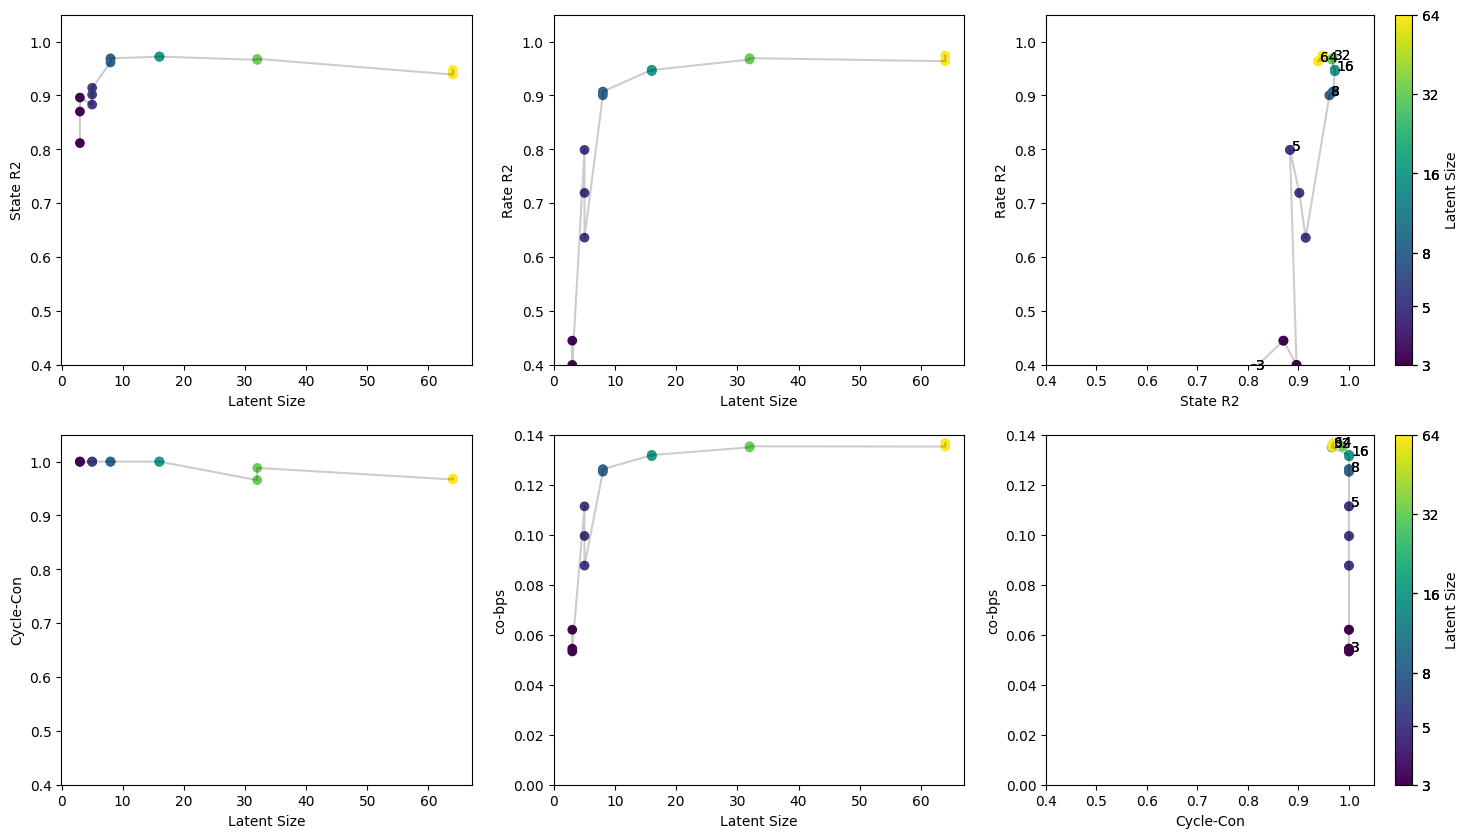

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 3, figsize=(18, 10))
# Sort by latent size and plot

ax[0,0].scatter(lat_sizes, metrics_GRU["state_r2"], c = np.log10(lat_sizes))
ax[0,0].plot(lat_sizes, metrics_GRU["state_r2"], c= 'k', alpha=0.2)
ax[0,0].set_xlabel("Latent Size")
ax[0,0].set_ylabel("State R2")
ax[0,0].set_ylim(0.4, 1.05)

ax[0,1].scatter(lat_sizes, metrics_GRU["rate_r2"], c = np.log10(lat_sizes))
ax[0,1].plot(lat_sizes, metrics_GRU["rate_r2"], c= 'k', alpha=0.2)
ax[0,1].set_xlabel("Latent Size")
ax[0,1].set_ylabel("Rate R2")
ax[0,1].set_ylim(0.4, 1.05)

ax[0,2].scatter(metrics_GRU["state_r2"], metrics_GRU["rate_r2"], c=np.log10(lat_sizes))
ax[0,2].plot(metrics_GRU["state_r2"], metrics_GRU["rate_r2"], c= 'k', alpha=0.2)
ax[0,2].set_xlabel("State R2")
ax[0,2].set_ylabel("Rate R2")
ax[0,2].set_xlim(0.4, 1.05)
ax[0,2].set_ylim(0.4, 1.05)

# add colorbar with ticks for each latent size
cbar = plt.colorbar(ax[0,2].scatter(metrics_GRU["state_r2"], metrics_GRU["rate_r2"], c=np.log10(lat_sizes)))
cbar.set_label("Latent Size")
cbar.set_ticks(np.log10(lat_sizes))
cbar.set_ticklabels(lat_sizes)

for lat_size in lat_sizes:
    ax[0,2].text(metrics_GRU["state_r2"][lat_sizes.index(lat_size)]+0.004, metrics_GRU["rate_r2"][lat_sizes.index(lat_size)], str(lat_size))


# Non-ground-truth metrics
ax[1,0].scatter(lat_sizes, metrics_GRU["linear_cycle_con"], c = np.log10(lat_sizes))
ax[1,0].plot(lat_sizes, metrics_GRU["linear_cycle_con"], c= 'k', alpha=0.2)
ax[1,0].set_xlabel("Latent Size")
ax[1,0].set_ylabel("Cycle-Con")
ax[1,0].set_ylim(0.4, 1.05)

ax[1,1].scatter(lat_sizes, metrics_GRU["co-bps"], c = np.log10(lat_sizes))
ax[1,1].plot(lat_sizes, metrics_GRU["co-bps"], c= 'k', alpha=0.2)
ax[1,1].set_xlabel("Latent Size")
ax[1,1].set_ylabel("co-bps")
ax[1,1].set_ylim(0.0, 0.14)

ax[1,2].scatter(metrics_GRU["linear_cycle_con"], metrics_GRU["co-bps"], c=np.log10(lat_sizes))
ax[1,2].plot(metrics_GRU["linear_cycle_con"], metrics_GRU["co-bps"], c= 'k', alpha=0.2)
ax[1,2].set_xlabel("Cycle-Con")
ax[1,2].set_ylabel("co-bps")
ax[1,2].set_xlim(0.4, 1.05)
ax[1,2].set_ylim(0.0, 0.14)

# add colorbar with ticks for each latent size
cbar = plt.colorbar(ax[1,2].scatter(metrics_GRU["linear_cycle_con"], metrics_GRU["co-bps"], c=np.log10(lat_sizes)))
cbar.set_label("Latent Size")
cbar.set_ticks(np.log10(lat_sizes))
cbar.set_ticklabels(lat_sizes)

for lat_size in lat_sizes:
    ax[1,2].text(metrics_GRU["linear_cycle_con"][lat_sizes.index(lat_size)]+0.004, metrics_GRU["co-bps"][lat_sizes.index(lat_size)], str(lat_size))



(0.0, 0.14)

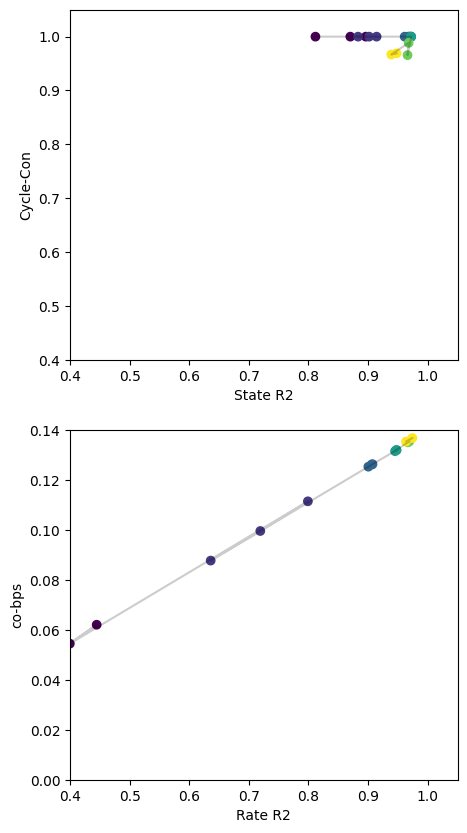

In [8]:
fig = plt.figure(figsize=(5, 10))
ax =fig.add_subplot(211)
ax.scatter(metrics_GRU["state_r2"], metrics_GRU["linear_cycle_con"], c=np.log10(lat_sizes))
ax.plot(metrics_GRU["state_r2"], metrics_GRU["linear_cycle_con"], c= 'k', alpha=0.2)
ax.set_xlabel("State R2")
ax.set_ylabel("Cycle-Con")
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.4, 1.05)

ax =fig.add_subplot(212)
ax.scatter(metrics_GRU["rate_r2"], metrics_GRU["co-bps"], c=np.log10(lat_sizes))
ax.plot(metrics_GRU["rate_r2"], metrics_GRU["co-bps"], c= 'k', alpha=0.2)
ax.set_xlabel("Rate R2")
ax.set_ylabel("co-bps")
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.0, 0.14)
